In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose,  MaxPool2D, Concatenate
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K

In [2]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [3]:
def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [4]:
def build_densenet121_unet(input_shape):
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained DenseNet121 Model """
    densenet = DenseNet121(include_top=False, weights="imagenet", input_tensor=inputs)

    """ Encoder """
    s1 = densenet.get_layer("input_1").output       ## 256
    s2 = densenet.get_layer("conv1/relu").output    ## 128
    s3 = densenet.get_layer("pool2_relu").output    ## 64
    s4 = densenet.get_layer("pool3_relu").output    ## 32

    """ Bridge """
    b1 = densenet.get_layer("pool4_relu").output  ## 16

    """ Decoder """
    d1 = decoder_block(b1, s4, 256)             ## 32
    d2 = decoder_block(d1, s3, 128)             ## 64
    d3 = decoder_block(d2, s2, 64)             ## 128
    d4 = decoder_block(d3, s1, 32)              ## 256

    """ Outputs """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs)
    return model

In [5]:
if __name__ == "__main__":
    input_shape = (224, 224, 3)
    model = build_densenet121_unet(input_shape)
    model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [6]:
from glob import glob
import cv2

In [7]:
!mkdir '/content/salamm'

mkdir: cannot create directory ‘/content/salamm’: File exists


In [8]:
!cp "/content/drive/MyDrive/nct/image.tif" "/content/salamm"

In [9]:
!cp "/content/drive/MyDrive/nct/roi_1_210407_S03_annotations_Bianca_30.11.2021_update_JT_11.10.22.tif" "/content/salamm"      #/content/drive/MyDrive/nct/roi_1_210407_S03_annotations_Bianca_30.11.2021_update_JT_11.10.22.tif

In [10]:
#!cp "/content/drive/MyDrive/nct/cell1.tif" "/content/salamm"

In [11]:
!mkdir '/content/salamm/image_file'

mkdir: cannot create directory ‘/content/salamm/image_file’: File exists


In [12]:
from PIL import Image, ImageSequence

im = Image.open("/content/salamm/image.tif")   #/content/salam/image.tif

for i, page in enumerate(ImageSequence.Iterator(im)):
    page.save("/content/salamm/image_file/Page%d.tif" % i)

In [13]:
!mkdir '/content/salamm/mask_file'

mkdir: cannot create directory ‘/content/salamm/mask_file’: File exists


In [14]:
from PIL import Image, ImageSequence

im = Image.open("/content/salamm/roi_1_210407_S03_annotations_Bianca_30.11.2021_update_JT_11.10.22.tif")   #/content/salam/image.tif

for i, page in enumerate(ImageSequence.Iterator(im)):
    page.save("/content/salamm/mask_file/Page%d.tif" % i)

In [15]:
#!mkdir '/content/salamm/20_cells'

In [16]:
#from PIL import Image, ImageSequence

#im = Image.open("/content/salamm/cell1.tif")   #/content/salam/image.tif

#for i, page in enumerate(ImageSequence.Iterator(im)):
#    page.save("/content/salamm/20_cells/Page%d.tif" % i)

In [17]:
masks_paths= glob('/content/salamm/mask_file/*')     #masks_paths= glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
images_paths= glob('/content/salamm/image_file/*')
#cell_paths= glob('/content/salamm/20_cells/*')
#images_paths=[path.replace("_mask","") for path in masks_paths]
print(f"The no of mask images is {len(masks_paths)}.")
print(f"The no of images is {len(images_paths)}.")
#print(f"The no of cell_1 images is{len(cell_paths)}.")

The no of mask images is 492.
The no of images is 492.


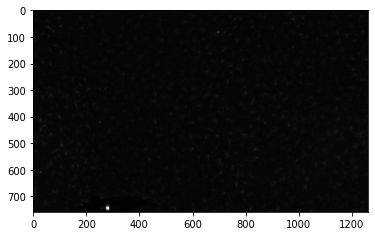

In [18]:
import matplotlib.pyplot as plt
import numpy
img=cv2.imread(images_paths[17])
#msk=cv2.imread(masks_paths[17])
plt.imshow(img)
#plt.imshow(msk, alpha=0.2)  #plt.imshow(msk,alpha=0.5)
plt.show() 

In [19]:
import pandas as pd
import numpy as np

In [20]:
#DataPath = '/kaggle/input/lgg-mri-segmentation/kaggle_3m/'


#dirs = []
#images = []
#masks = []
#for dirname, _, filenames in os.walk(DataPath):
#    for filename in filenames:
#        if 'mask'in filename:
#            dirs.append(dirname.replace(DataPath, ''))
#           masks.append(filename)
#            images.append(filename.replace('_mask', ''))

In [21]:
#ataFrame=pd.DataFrame({"images":images_paths,"mask":masks_paths,"diagnosis":[1 if (np.max(cv2.imread(imagepath))>0) else 0 for imagepath in masks_paths]})
DataFrame_df = pd.DataFrame({'images':images_paths,'masks':masks_paths})

In [22]:
DataFrame_df.head(30)

,images,masks
0,/content/salamm/image_file/Page163.tif,/content/salamm/mask_file/Page163.tif
1,/content/salamm/image_file/Page201.tif,/content/salamm/mask_file/Page201.tif
2,/content/salamm/image_file/Page102.tif,/content/salamm/mask_file/Page102.tif
3,/content/salamm/image_file/Page85.tif,/content/salamm/mask_file/Page85.tif
4,/content/salamm/image_file/Page222.tif,/content/salamm/mask_file/Page222.tif
5,/content/salamm/image_file/Page144.tif,/content/salamm/mask_file/Page144.tif
6,/content/salamm/image_file/Page416.tif,/content/salamm/mask_file/Page416.tif
7,/content/salamm/image_file/Page419.tif,/content/salamm/mask_file/Page419.tif
8,/content/salamm/image_file/Page387.tif,/content/salamm/mask_file/Page387.tif
9,/content/salamm/image_file/Page115.tif,/content/salamm/mask_file/Page115.tif


In [23]:
#import seaborn as sns
#fig, ax = plt.subplots(figsize=(10,10))
#ax = sns.barplot(x=DataFrame["diagnosis"].unique(),y=DataFrame["diagnosis"].value_counts())
#ax.set_xlabel("diagnosis")
#ax.set_ylabel("no of images")
#ax.set_xticklabels(['No Tumor', 'Tumor'], fontsize=12, rotation=0)
#ax.legend()
#plt.show()

In [24]:
from sklearn.model_selection import train_test_split
traindata,testdata=train_test_split(DataFrame_df,test_size=0.1,random_state=42)
traindata,valdata=train_test_split(traindata,test_size=0.2,random_state=42)

In [25]:
print('Train.shape: {}\nTest.shape: {}'.format(traindata.shape, testdata.shape))   #print('X.shape: {}\ny.shape: {}'.format(X_train.shape, y_train.shape))

Train.shape: (353, 2)
Test.shape: (50, 2)


In [26]:
print(f"train size is {len(traindata)},val size is {len(valdata)},test size is {len(testdata)}")

train size is 353,val size is 89,test size is 50


In [27]:
print('Train.size: {}\nTest.size: {}'.format(traindata.size, testdata.size))   #print('X.shape: {}\ny.shape: {}'.format(X_train.shape, y_train.shape))

Train.size: 706
Test.size: 100


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)


def trainDataGeneration(traindata):
    
    ##Data Augmentation
    image_datagen = ImageDataGenerator(dict(rotation_range=0.2,
                                        rescale=1./255,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest'))
    mask_datagen = ImageDataGenerator(dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest'))

    ##flow the images from paths 
    image_generator = image_datagen.flow_from_dataframe(
    traindata,
    x_col = "images",
    class_mode = None,
    color_mode = "rgb",
    target_size = (224,224),
    batch_size = 16,seed=42
    )
    mask_generator = mask_datagen.flow_from_dataframe(
    traindata,
    x_col = "masks",
    class_mode = None,
    color_mode = "grayscale",
    target_size = (224,224),
    batch_size = 16,seed=42
    )
    for (img, mask) in zip(image_generator, mask_generator):
        img, mask = adjust_data(img, mask)
        yield (img,mask)
def testDataGeneration(valdata):
    image_datagen = ImageDataGenerator(dict())
    mask_datagen = ImageDataGenerator(dict())
    image_generator = image_datagen.flow_from_dataframe(
        valdata,
        x_col = "images",
        class_mode = None,
        color_mode = 'rgb',
        target_size = (224,224),
        batch_size = 16,
        seed = 42)

    mask_generator = mask_datagen.flow_from_dataframe(
        valdata,
        x_col = "masks",
        class_mode = None,
        color_mode = "grayscale",
        target_size = (224,224),
        batch_size = 16,
        seed = 42)
    for (img, mask) in zip(image_generator, mask_generator):
        img, mask = adjust_data(img, mask)
        yield (img,mask)

In [35]:
smooth=100

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jac_distance(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)

    return - iou(y_true, y_pred)

In [36]:
trainingdata=trainDataGeneration(traindata)
validationdata=testDataGeneration(valdata)

In [37]:
BATCH_SIZE = 16
epochs=30
learning_rate=0.0001
decay_rate = learning_rate / epochs
model.compile(optimizer=Adam(lr=learning_rate,decay=decay_rate), loss=dice_coef_loss, metrics=["binary_accuracy", iou, dice_coef])
callbacks = [ModelCheckpoint('brainSeg.hdf5', verbose=1, save_best_only=True)]
history = model.fit(trainingdata,
                    steps_per_epoch=len(traindata) / BATCH_SIZE, 
                    epochs=epochs, 
                    callbacks=callbacks,
                    validation_data = validationdata,
                    validation_steps=len(valdata) / BATCH_SIZE)

Found 353 validated image filenames.
Found 353 validated image filenames.
Epoch 1/30
23/22 [===============================] - ETA: 0s - loss: -5.9471e-04 - binary_accuracy: 0.9811 - iou: 9.5923e-04 - dice_coef: 9.5923e-04
Epoch 1: val_loss improved from inf to -0.00017, saving model to brainSeg.hdf5
22/22 [==============================] - 28s 618ms/step - loss: -5.9471e-04 - binary_accuracy: 0.9811 - iou: 9.5923e-04 - dice_coef: 9.5923e-04 - val_loss: -1.7246e-04 - val_binary_accuracy: 0.9997 - val_iou: 1.7480e-04 - val_dice_coef: 1.7480e-04
Epoch 2/30
23/22 [===============================] - ETA: 0s - loss: -6.5454e-04 - binary_accuracy: 0.9823 - iou: 0.0010 - dice_coef: 0.0010       
Epoch 2: val_loss improved from -0.00017 to -0.00018, saving model to brainSeg.hdf5
22/22 [==============================] - 12s 548ms/step - loss: -6.5454e-04 - binary_accuracy: 0.9823 - iou: 0.0010 - dice_coef: 0.0010 - val_loss: -1.8378e-04 - val_binary_accuracy: 1.0000 - val_iou: 1.8628e-04 - val_

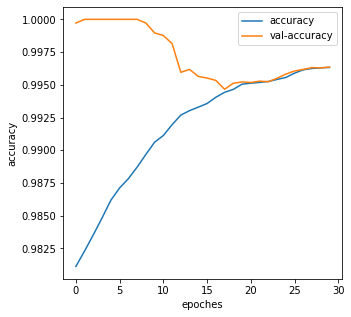

In [38]:
plt.figure(figsize=(5,5))
plt.plot(history.history["binary_accuracy"],label="accuracy")
plt.plot(history.history["val_binary_accuracy"],label="val-accuracy")
plt.xlabel("epoches")
plt.ylabel("accuracy")
plt.legend()

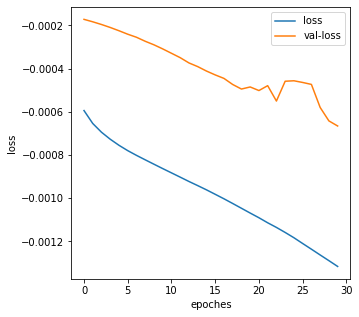

In [39]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val-loss")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend()

In [40]:
model = load_model("./brainSeg.hdf5", custom_objects={'dice_coef_loss': dice_coef_loss, 'iou': iou, 'dice_coef': dice_coef})
results = model.evaluate(testDataGeneration(testdata), steps=len(testdata) / BATCH_SIZE)
print("Test lost: ",results[0])
print("Test IOU: ",results[2])
print("Test Dice Coefficent: ",results[3])

Found 50 validated image filenames.
Found 50 validated image filenames.
3/3 [==============================] - 3s 887ms/step - loss: -0.0016 - binary_accuracy: 0.9964 - iou: 0.0034 - dice_coef: 0.0034  
Test lost:  -0.00157663703430444
Test IOU:  0.003373426618054509
Test Dice Coefficent:  0.003373426618054509


1/1 [==============================] - 1s 1s/step


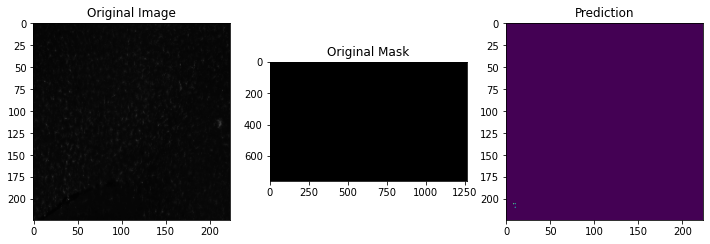

1/1 [==============================] - 0s 25ms/step


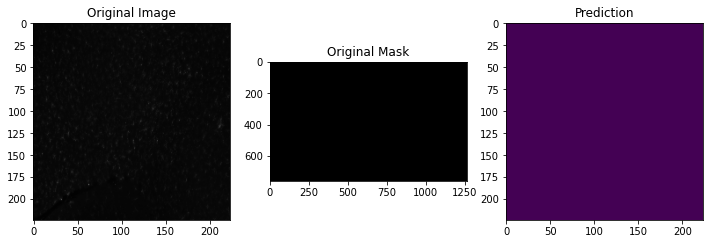

1/1 [==============================] - 0s 26ms/step


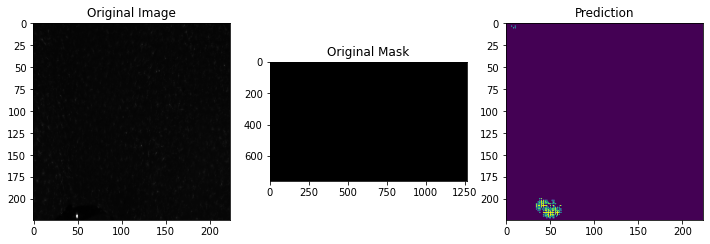

1/1 [==============================] - 0s 25ms/step


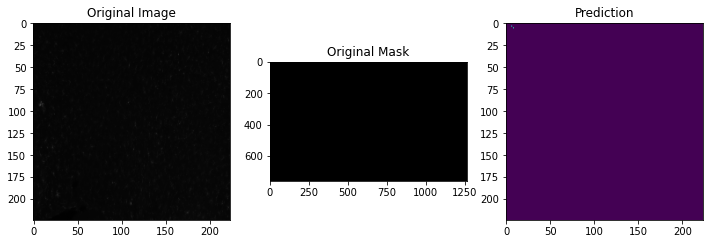

1/1 [==============================] - 0s 26ms/step


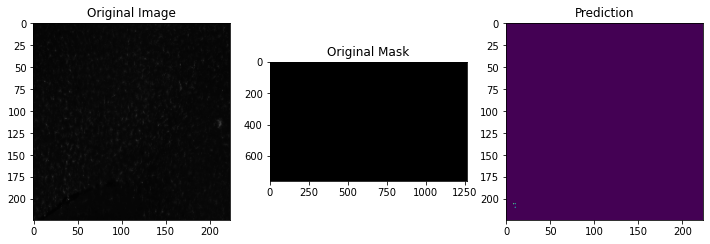

1/1 [==============================] - 0s 25ms/step


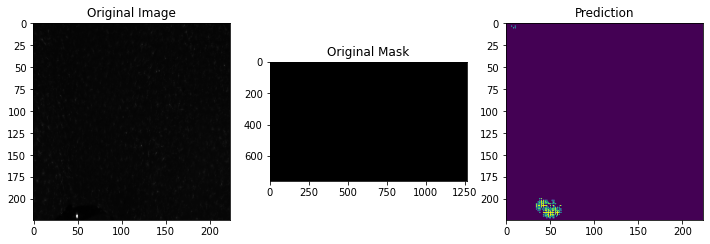

1/1 [==============================] - 0s 27ms/step


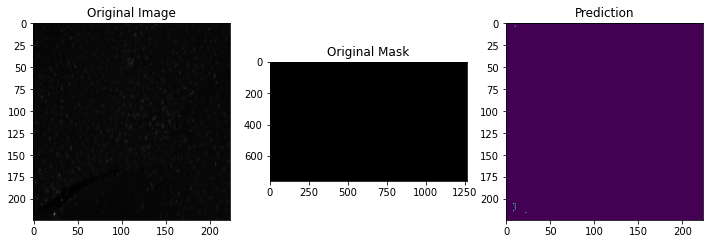

1/1 [==============================] - 0s 26ms/step


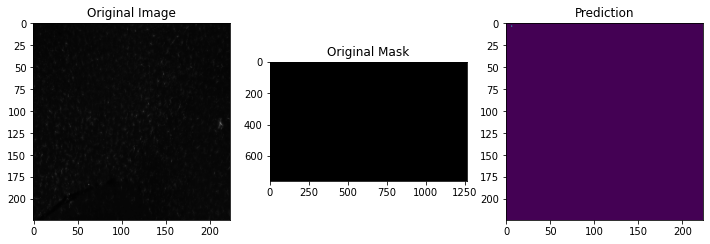

1/1 [==============================] - 0s 25ms/step


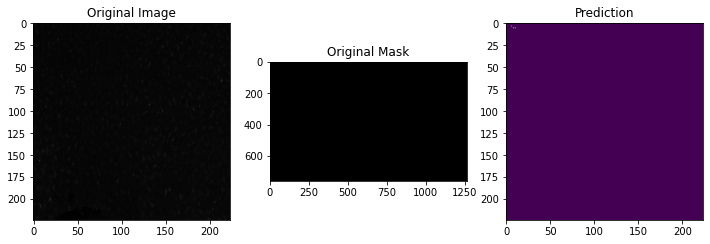

1/1 [==============================] - 0s 25ms/step


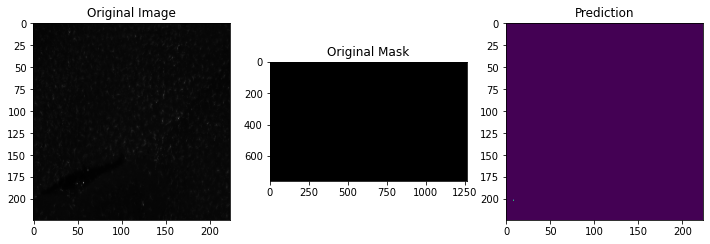

1/1 [==============================] - 0s 25ms/step


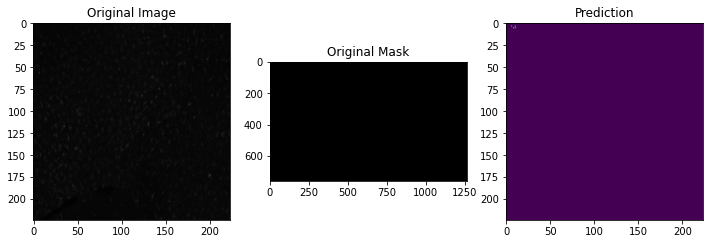

1/1 [==============================] - 0s 30ms/step


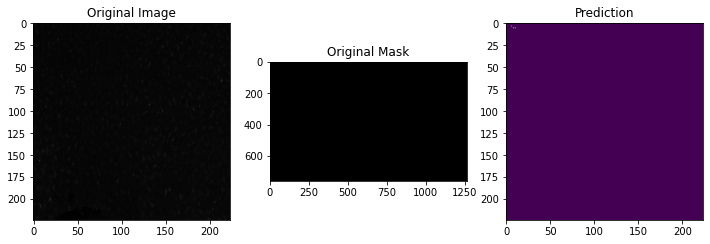

1/1 [==============================] - 0s 26ms/step


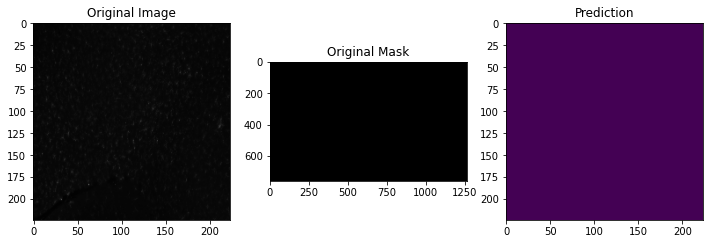

1/1 [==============================] - 0s 25ms/step


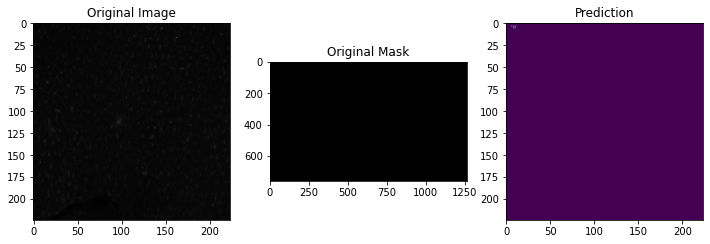

1/1 [==============================] - 0s 26ms/step


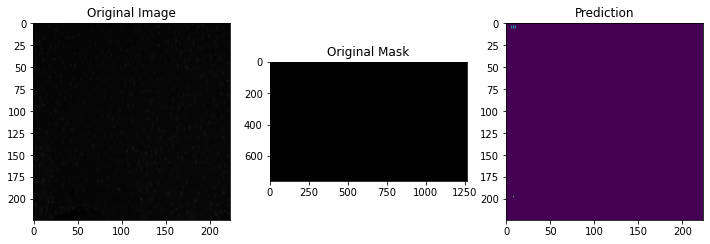

1/1 [==============================] - 0s 25ms/step


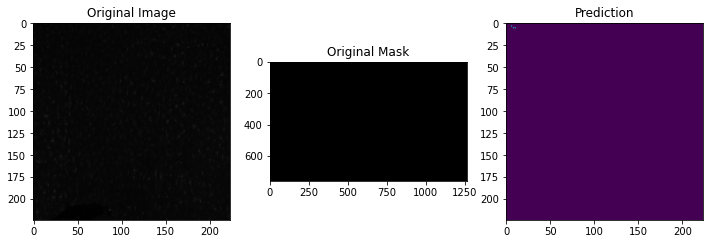

1/1 [==============================] - 0s 27ms/step


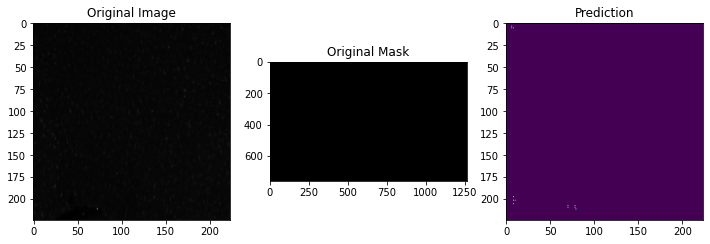

1/1 [==============================] - 0s 26ms/step


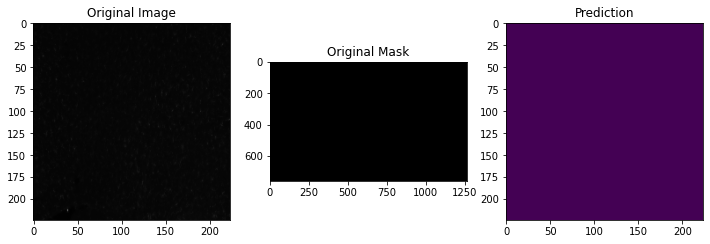

1/1 [==============================] - 0s 28ms/step


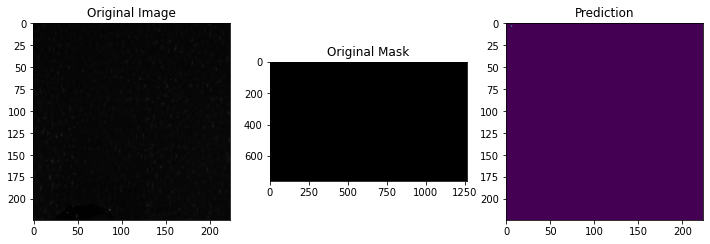

1/1 [==============================] - 0s 27ms/step


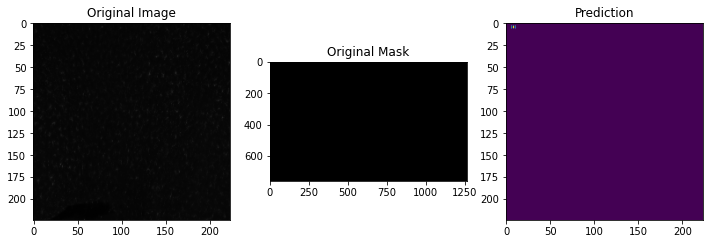

1/1 [==============================] - 0s 29ms/step


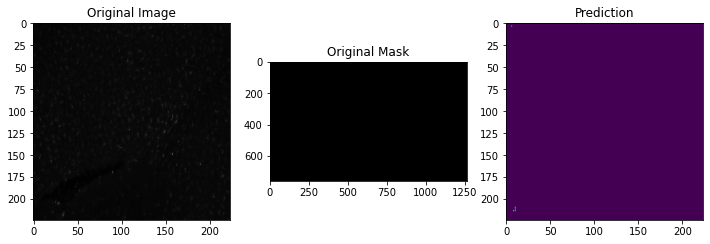

1/1 [==============================] - 0s 28ms/step


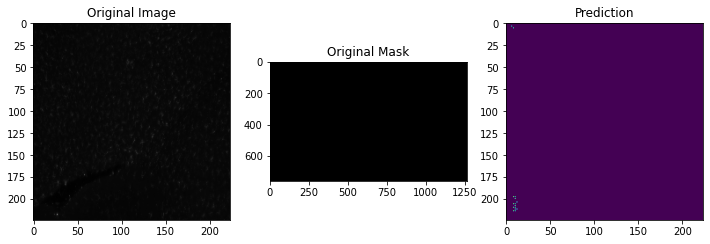

1/1 [==============================] - 0s 26ms/step


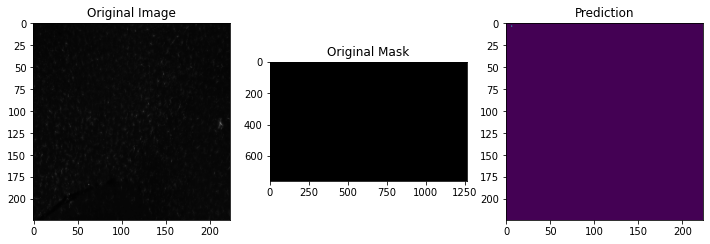

1/1 [==============================] - 0s 26ms/step


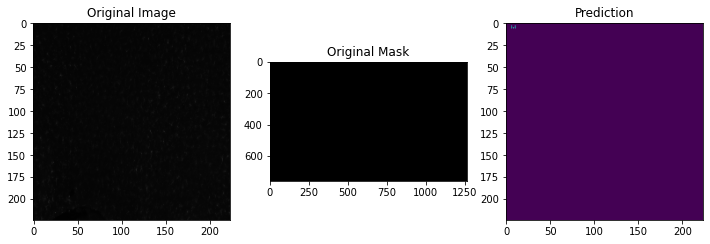

1/1 [==============================] - 0s 27ms/step


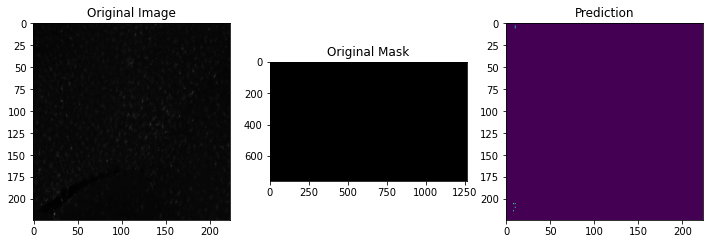

1/1 [==============================] - 0s 25ms/step


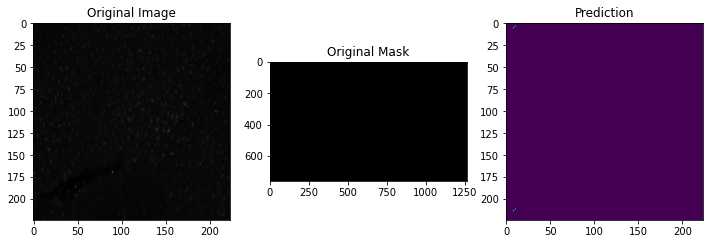

1/1 [==============================] - 0s 26ms/step


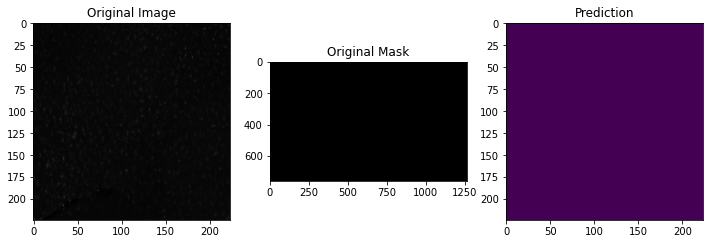

1/1 [==============================] - 0s 25ms/step


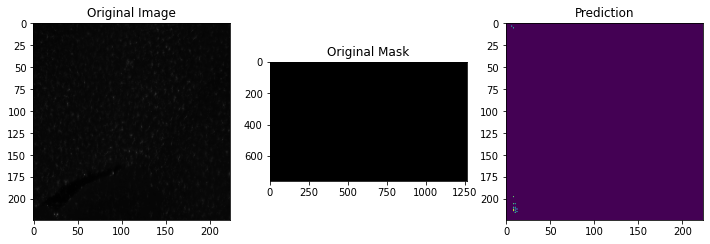

1/1 [==============================] - 0s 27ms/step


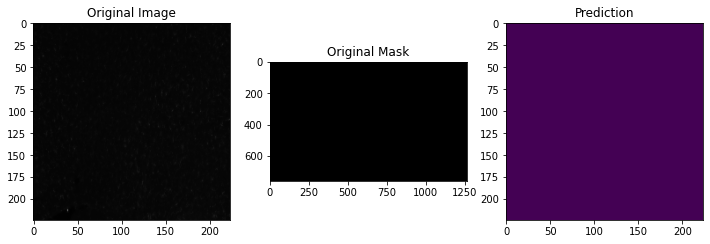

1/1 [==============================] - 0s 25ms/step


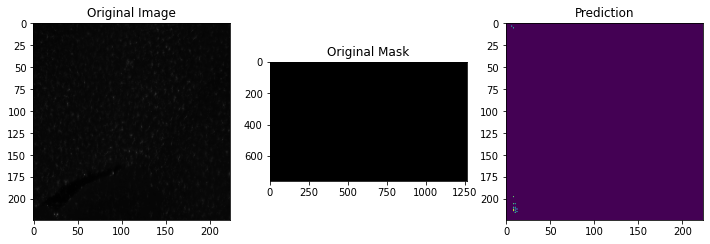

1/1 [==============================] - 0s 25ms/step


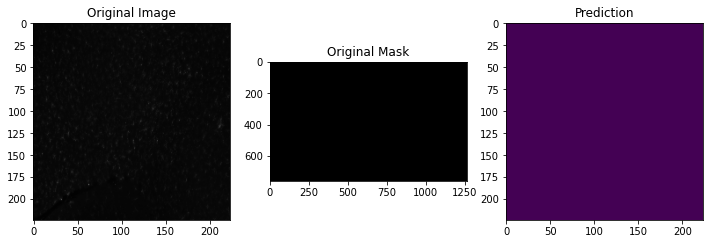

1/1 [==============================] - 0s 25ms/step


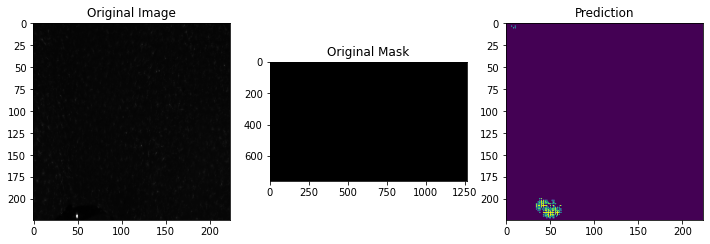

1/1 [==============================] - 0s 26ms/step


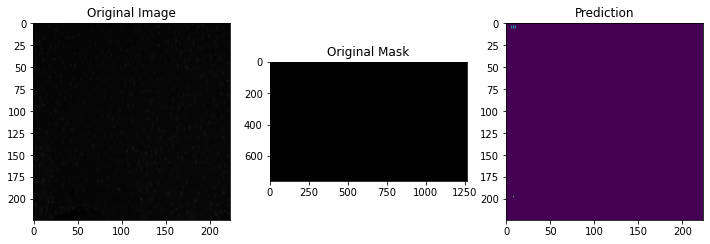

1/1 [==============================] - 0s 25ms/step


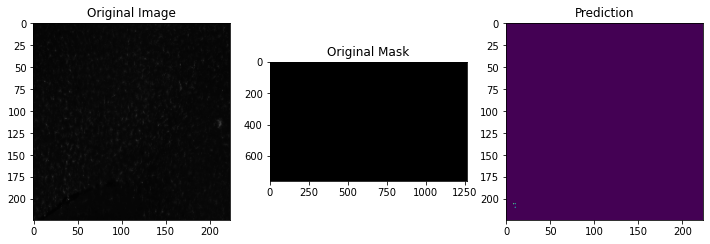

1/1 [==============================] - 0s 27ms/step


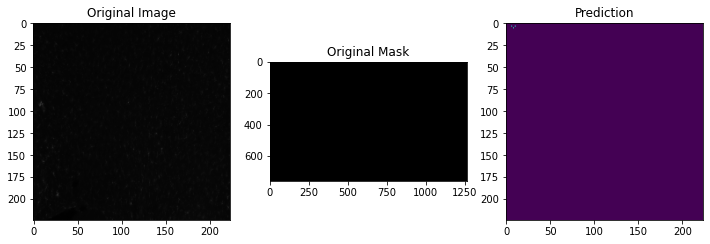

1/1 [==============================] - 0s 32ms/step


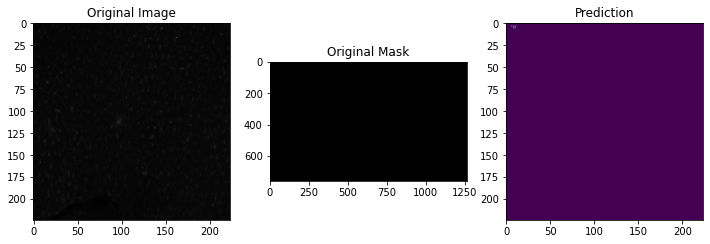

1/1 [==============================] - 0s 28ms/step


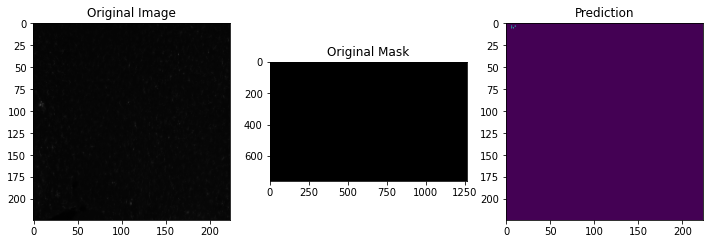

1/1 [==============================] - 0s 25ms/step


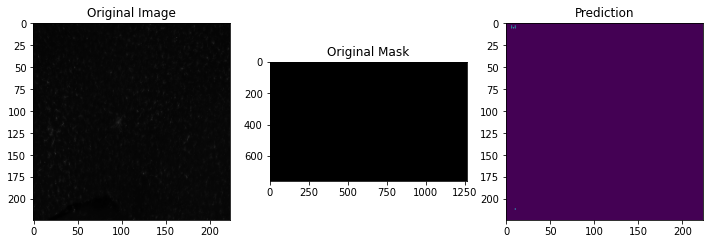

1/1 [==============================] - 0s 25ms/step


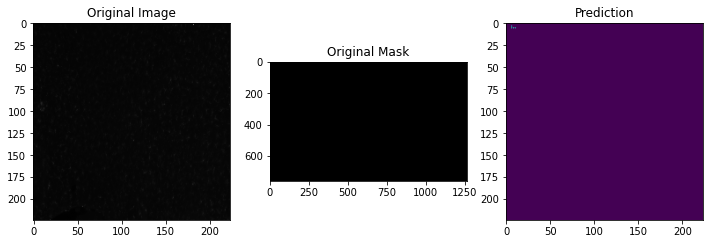

1/1 [==============================] - 0s 28ms/step


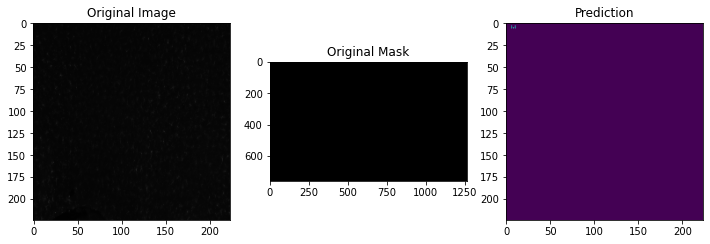

1/1 [==============================] - 0s 25ms/step


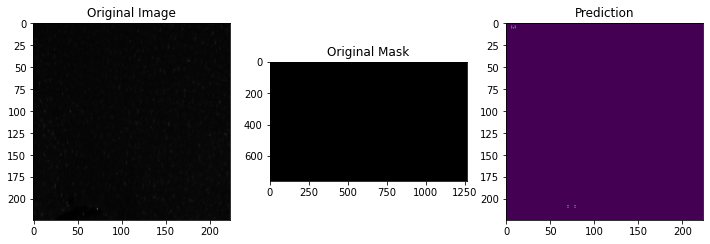

1/1 [==============================] - 0s 25ms/step


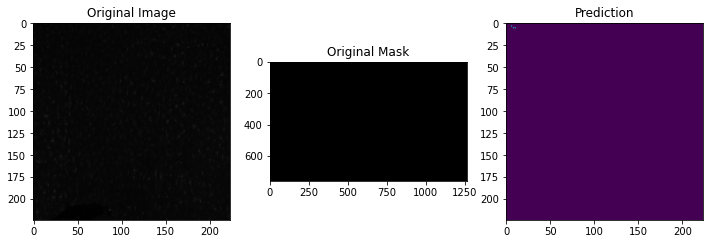

1/1 [==============================] - 0s 26ms/step


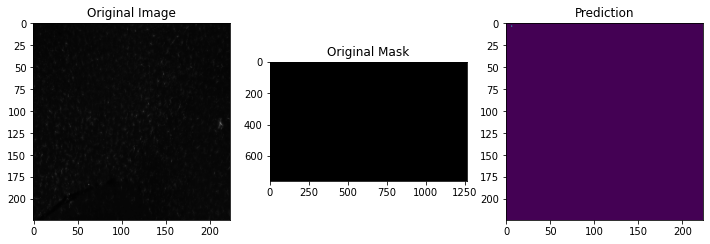

1/1 [==============================] - 0s 27ms/step


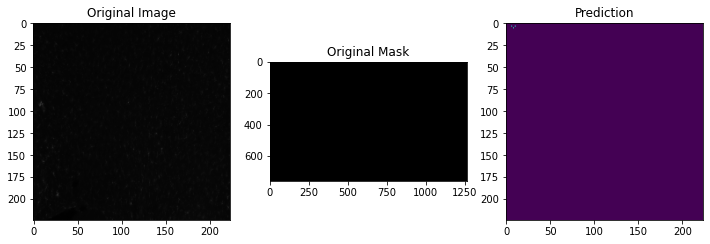

1/1 [==============================] - 0s 26ms/step


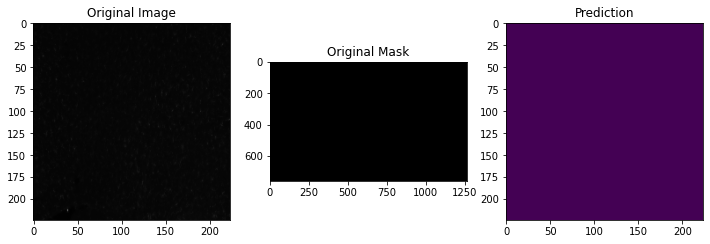

1/1 [==============================] - 0s 30ms/step


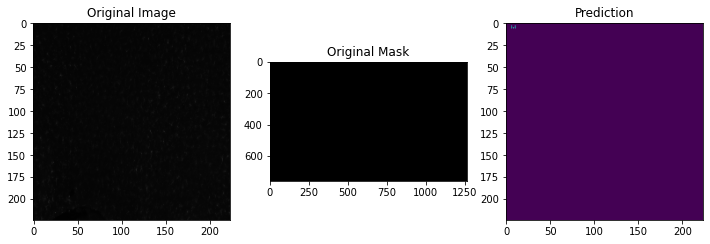

1/1 [==============================] - 0s 26ms/step


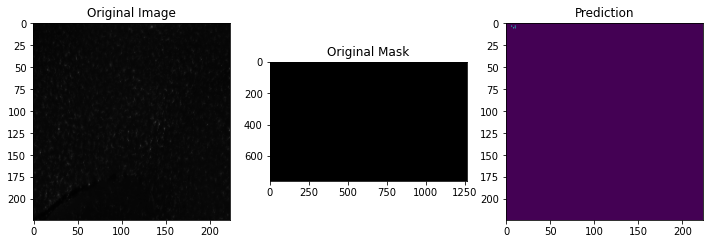

1/1 [==============================] - 0s 30ms/step


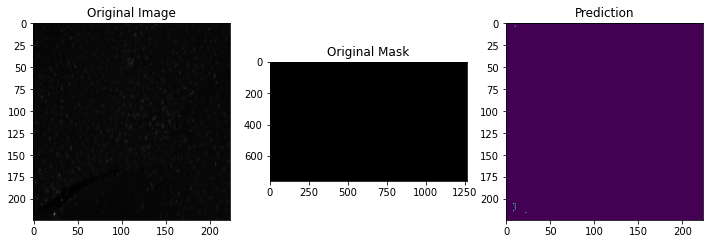

1/1 [==============================] - 0s 26ms/step


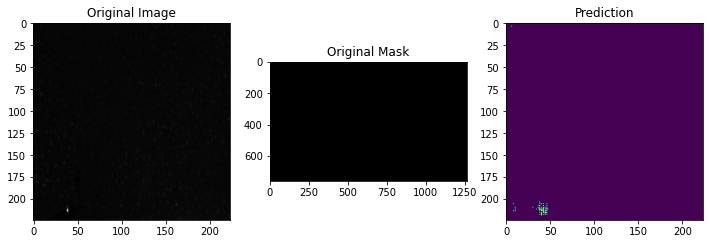

1/1 [==============================] - 0s 25ms/step


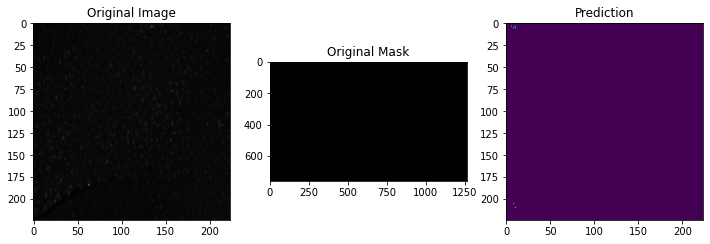

In [42]:
for loop in range(50):
    index=np.random.randint(1,len(testdata.index))
    img = cv2.imread(testdata['images'].iloc[index])
    img = cv2.resize(img ,(224, 224))
    img = img / 255
    img=np.expand_dims(img, axis=0)
    pred=model.predict(img)
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(testdata['masks'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()